# About Dataset
Context
With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

Go crazy with the dataset, but also make sure to provide some business insights to improve.

# Metadata
Row ID => Unique ID for each row.

Order ID => Unique Order ID for each Customer.

Order Date => Order Date of the product.

Ship Date => Shipping Date of the Product.

Ship Mode=> Shipping Mode specified by the Customer.

Customer ID => Unique ID to identify each Customer.

Customer Name => Name of the Customer.

Segment => The segment where the Customer belongs.

Country => Country of residence of the Customer.

City => City of residence of of the Customer.

State => State of residence of the Customer.

Postal Code => Postal Code of every Customer.

Region => Region where the Customer belong.

Product ID => Unique ID of the Product.

Category => Category of the product ordered.

Sub-Category => Sub-Category of the product ordered.

Product Name => Name of the Product.

Sales => Sales of the Product.

Quantity => Quantity of the Product.

Discount => Discount provided.

Profit => Profit/Loss incurred.


# 1- Loading And Reading For Data


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
Path to dataset files: /kaggle/input/superstore-dataset-final


In [3]:
import pandas as pd
df=pd.read_csv("/kaggle/input/superstore-dataset-final/Sample - Superstore.csv",encoding="latin1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Transformation and Preprocessing Of Data

In [4]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


# 1- Info and describe


In [5]:
print("The Shape of Data : ",df.shape)
print("\nData types and non-null counts:\n")
print(df.info())
print("\nNumeric summary:\n")
display(df.describe())

The Shape of Data :  (9994, 21)

Data types and non-null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null  

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# 2- Data Cleaning

### Check Nulls

In [6]:
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


## Duplicates

In [7]:

print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


## Remove White Spaces from 'Country', 'City', 'State'

In [8]:
df['City'] = df['City'].str.strip()
df['State'] = df['State'].str.strip()
df['Country'] = df['Country'].str.strip()

## 'Country', 'City', 'State' in Tilte case

In [9]:
df['City'] = df['City'].str.title()
df['State'] = df['State'].str.title()
df['Country'] = df['Country'].str.title()

## Trim whitespace for object columns


In [10]:
clean_df = df.copy()

In [11]:
str_cols = clean_df.select_dtypes(include='object').columns.tolist()
for c in str_cols:
    print(c)
    clean_df[c] = clean_df[c].astype(str).str.strip()

Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Region
Product ID
Category
Sub-Category
Product Name


## Standardize Category/Sub-Category

In [12]:
if 'Category' in clean_df.columns:
    clean_df['Category'] = clean_df['Category'].str.title()
if 'Sub-Category' in clean_df.columns:
    clean_df['Sub-Category'] = clean_df['Sub-Category'].str.title()

## Ensure numeric columns








In [13]:
for c in ['Sales','Quantity','Discount','Profit']:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors='coerce')

### Transform "Order Date" and "Ship Date" to datetime type

In [14]:
clean_df["Order Date"] = pd.to_datetime(clean_df["Order Date"])
clean_df["Ship Date"] = pd.to_datetime(clean_df["Ship Date"])

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# 3-Feature Engineering
## Spilt Order_Date to Year, Qarter, Month and Day

In [26]:
clean_df["Order_Day"] = clean_df["Order Date"].dt.day
clean_df["Order_Month"] = clean_df["Order Date"].dt.month
clean_df["Order_Year"] = clean_df["Order Date"].dt.year
clean_df['Order_Quarter'] = clean_df['Order Date'].dt.to_period('Q')

## Spilt Ship_Date to Year, Quarter, Month and Day

In [25]:
clean_df["Ship_Day"] = clean_df["Ship Date"].dt.day
clean_df["Ship_Month"] = clean_df["Ship Date"].dt.month
clean_df["Ship_Year"] = clean_df["Ship Date"].dt.year
clean_df['Ship_Quarter'] = clean_df['Ship Date'].dt.to_period('Q')

## Add Order_Weekday and Is_Weekend flag
- **Order_Weekday** = the day name of the order date (e.g., Monday, Tuesday, …) → used for analyzing distribution of sales across weekdays.

- **Is_Weekend** = a simple flag (Yes/No or 1/0) that indicates whether the order was placed during the weekend.

In [27]:

clean_df['Order_Weekday'] = clean_df['Order Date'].dt.day_name()
clean_df['Is_Weekend'] = clean_df['Order_Weekday'].isin(['Friday', 'Saturday', 'Sunday']).astype(int)

## Adding Ship_Duration

In [45]:
clean_df['Ship_Duration'] = (clean_df['Ship Date'] - clean_df['Order Date']).dt.days

## Profit Margin

In [16]:
clean_df['Profit_Margin'] = clean_df['Profit'] / clean_df['Sales']

## Adding Revenue_Before_Discount
**Revenue_Before_Discount** = the original revenue amount before applying any discounts.

In [17]:
clean_df['Revenue_Before_Discount'] = clean_df['Sales'] / (1 - clean_df['Discount'])


## Adding High_Discount_Flag
**High_Discount_Flag** = an indicator (Yes/No or 1/0) that shows whether the applied discount on an order is considered high (above a defined threshold, e.g., > 25\%).

In [18]:
threshold = 0.25
clean_df['High_Discount_Flag'] = (clean_df['Discount'] > threshold).astype(int)

In [19]:
clean_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit_Margin', 'Revenue_Before_Discount', 'High_Discount_Flag'],
      dtype='object')

In [20]:
clean_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Margin,Revenue_Before_Discount,High_Discount_Flag
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,261.96,0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,731.94,0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,14.62,0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,1741.05,1
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,27.96,0


In [52]:
from graphviz import Digraph

erd = Digraph("Superstore_ERD", format="png")
erd.attr(rankdir="LR", bgcolor="white")

fact_color = "lightcoral"
dim_color = "lightblue"

# Fact Table
erd.node("FactSales", """FactSales
-------------------
Row ID (PK)
Order ID (BK)
Product ID (FK)
Customer ID (FK)
Order Date ID (FK)
Ship Date ID (FK)
Ship Mode ID (FK)
Location ID (FK)
Sales
Quantity
Discount
Revenue_Before_Discount
Profit
Profit_Margin
Ship_Duration
High_Discount_Flag""", shape="box", style="filled", fillcolor=fact_color)

# Dimensions
erd.node("DimDate", """DimDate
-------------------
Date ID (PK)
Full Date
Day
Month
Year
Quarter
Weekday
Is_Weekend""", shape="box", style="filled", fillcolor=dim_color)

erd.node("DimCustomer", """DimCustomer
-------------------
Customer ID (PK)
Customer Name
Segment""", shape="box", style="filled", fillcolor=dim_color)

erd.node("DimLocation", """DimLocation
-------------------
Location ID (PK)
Country
State
City
Region
Postal Code""", shape="box", style="filled", fillcolor=dim_color)

erd.node("DimProduct", """DimProduct
-------------------
Product ID (PK)
Product Name
Category
Sub-Category""", shape="box", style="filled", fillcolor=dim_color)

erd.node("DimShipMode", """DimShipMode
-------------------
Ship Mode ID (PK)
Ship Mode""", shape="box", style="filled", fillcolor=dim_color)

# Relations
erd.edge("FactSales", "DimDate", label="Order Date ID → Date ID")
erd.edge("FactSales", "DimDate", label="Ship Date ID → Date ID")
erd.edge("FactSales", "DimCustomer", label="Customer ID → Customer ID")
erd.edge("FactSales", "DimLocation", label="(via Customer/Order Location)")
erd.edge("FactSales", "DimProduct", label="Product ID → Product ID")
erd.edge("FactSales", "DimShipMode", label="Ship Mode ID → Ship Mode ID")


file_path = "/mnt/data/superstore_erd"
erd.render(file_path, cleanup=True)

file_path + ".png"


'/mnt/data/superstore_erd.png'

# Splitting the Dataset into Fact and Dimension Tables (Star Schema Transformation)

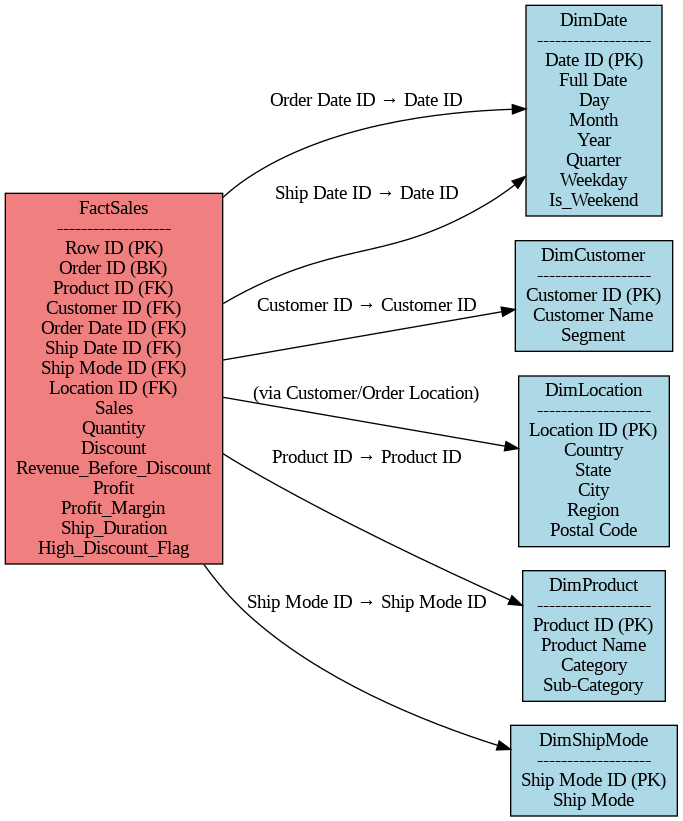

In [54]:
from IPython.display import Image
Image("/mnt/data/superstore_erd.png")

# Dim Tables

## 1-DimDate (Order Date + Ship Date)


In [28]:

dates = pd.concat([clean_df['Order Date'], clean_df['Ship Date']]).drop_duplicates().reset_index(drop=True)
dim_date = pd.DataFrame({'Full Date': dates})
dim_date['Date ID'] = dim_date.index + 1
dim_date['Day'] = dim_date['Full Date'].dt.day
dim_date['Month'] = dim_date['Full Date'].dt.month
dim_date['Year'] = dim_date['Full Date'].dt.year
dim_date['Quarter'] = dim_date['Full Date'].dt.quarter
dim_date['Weekday'] = dim_date['Full Date'].dt.day_name()
dim_date['Is_Weekend'] = dim_date['Weekday'].isin(['Saturday', 'Sunday']).astype(int)


In [29]:
dim_date

,Full Date,Date ID,Day,Month,Year,Quarter,Weekday,Is_Weekend
0,2016-11-08,1,8,11,2016,4,Tuesday,0
1,2016-06-12,2,12,6,2016,2,Sunday,1
2,2015-10-11,3,11,10,2015,4,Sunday,1
3,2014-06-09,4,9,6,2014,2,Monday,0
4,2017-04-15,5,15,4,2017,2,Saturday,1
...,...,...,...,...,...,...,...,...
1429,2014-02-10,1430,10,2,2014,1,Monday,0
1430,2015-02-01,1431,1,2,2015,1,Sunday,1
1431,2014-08-10,1432,10,8,2014,3,Sunday,1
1432,2014-03-12,1433,12,3,2014,1,Wednesday,0


## 2-DimCustomer

In [31]:
# 2- Dim_Product
dim_customer = df[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates().reset_index(drop=True)
dim_customer

,Customer ID,Customer Name,Segment
0,CG-12520,Claire Gute,Consumer
1,DV-13045,Darrin Van Huff,Corporate
2,SO-20335,Sean O'Donnell,Consumer
3,BH-11710,Brosina Hoffman,Consumer
4,AA-10480,Andrew Allen,Consumer
...,...,...,...
788,CJ-11875,Carl Jackson,Corporate
789,RS-19870,Roy Skaria,Home Office
790,SC-20845,Sung Chung,Consumer
791,RE-19405,Ricardo Emerson,Consumer


## 3-DimLocation

In [36]:

dim_location = df[['Country', 'State', 'City', 'Region', 'Postal Code']].drop_duplicates().reset_index(drop=True)
dim_location['Location ID'] = dim_location.index + 1
dim_location = dim_location[['Location ID', 'Country', 'State', 'City', 'Region', 'Postal Code']]
dim_location

,Location ID,Country,State,City,Region,Postal Code
0,1,United States,Kentucky,Henderson,South,42420
1,2,United States,California,Los Angeles,West,90036
2,3,United States,Florida,Fort Lauderdale,South,33311
3,4,United States,California,Los Angeles,West,90032
4,5,United States,North Carolina,Concord,South,28027
...,...,...,...,...,...,...
627,628,United States,Arkansas,Springdale,South,72762
628,629,United States,California,Lodi,West,95240
629,630,United States,Texas,La Porte,Central,77571
630,631,United States,Ohio,Mason,East,45040


## 4-DimProduct

In [37]:
dim_product = df[['Product ID', 'Product Name', 'Category', 'Sub-Category']].drop_duplicates().reset_index(drop=True)
dim_product

,Product ID,Product Name,Category,Sub-Category
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,Furniture,Bookcases
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables
4,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,Office Supplies,Storage
...,...,...,...,...
1889,TEC-PH-10002817,RCA ViSYS 25425RE1 Corded phone,Technology,Phones
1890,TEC-MA-10003589,Cisco 8961 IP Phone Charcoal,Technology,Machines
1891,OFF-AP-10003099,"Eureka Hand Vacuum, Bagless",Office Supplies,Appliances
1892,TEC-PH-10002645,LG G2,Technology,Phones


## 5-DimShipMode


In [38]:
dim_shipmode = df[['Ship Mode']].drop_duplicates().reset_index(drop=True)
dim_shipmode['Ship Mode ID'] = dim_shipmode.index + 1
dim_shipmode = dim_shipmode[['Ship Mode ID', 'Ship Mode']]
dim_shipmode


,Ship Mode ID,Ship Mode
0,1,Second Class
1,2,Standard Class
2,3,First Class
3,4,Same Day



# Fact Table

In [46]:
fact_sales = clean_df.copy()
fact_sales = fact_sales.merge(dim_date[['Date ID', 'Full Date']],
                              left_on='Order Date', right_on='Full Date', how='left') \
                       .rename(columns={'Date ID': 'Order Date ID'}).drop(columns=['Full Date'])

fact_sales = fact_sales.merge(dim_date[['Date ID', 'Full Date']],
                              left_on='Ship Date', right_on='Full Date', how='left') \
                       .rename(columns={'Date ID': 'Ship Date ID'}).drop(columns=['Full Date'])

fact_sales = fact_sales.merge(dim_location[['Location ID', 'Country', 'State', 'City', 'Region', 'Postal Code']],
                              on=['Country','State','City','Region','Postal Code'], how='left')

fact_sales = fact_sales.merge(dim_shipmode, on='Ship Mode', how='left')

fact_sales = fact_sales[['Row ID', 'Order ID', 'Product ID', 'Customer ID',
                         'Order Date ID', 'Ship Date ID', 'Ship Mode ID', 'Location ID',
                         'Sales', 'Quantity', 'Discount', 'Revenue_Before_Discount',
                         'Profit', 'Profit_Margin', 'Ship_Duration', 'High_Discount_Flag']]

In [47]:
fact_sales

,Row ID,Order ID,Product ID,Customer ID,Order Date ID,Ship Date ID,Ship Mode ID,Location ID,Sales,Quantity,Discount,Revenue_Before_Discount,Profit,Profit_Margin,Ship_Duration,High_Discount_Flag
0,1,CA-2016-152156,FUR-BO-10001798,CG-12520,1,584,1,1,261.9600,2,0.00,261.96,41.9136,0.1600,3,0
1,2,CA-2016-152156,FUR-CH-10000454,CG-12520,1,584,1,1,731.9400,3,0.00,731.94,219.5820,0.3000,3,0
2,3,CA-2016-138688,OFF-LA-10000240,DV-13045,2,951,1,2,14.6200,2,0.00,14.62,6.8714,0.4700,4,0
3,4,US-2015-108966,FUR-TA-10000577,SO-20335,3,1091,2,3,957.5775,5,0.45,1741.05,-383.0310,-0.4000,7,1
4,5,US-2015-108966,OFF-ST-10000760,SO-20335,3,1091,2,3,22.3680,2,0.20,27.96,2.5164,0.1125,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,FUR-FU-10001889,TB-21400,1237,1213,1,124,25.2480,3,0.20,31.56,4.1028,0.1625,2,0
9990,9991,CA-2017-121258,FUR-FU-10000747,DB-13060,426,449,2,147,91.9600,2,0.00,91.96,15.6332,0.1700,5,0
9991,9992,CA-2017-121258,TEC-PH-10003645,DB-13060,426,449,2,147,258.5760,2,0.20,323.22,19.3932,0.0750,5,0
9992,9993,CA-2017-121258,OFF-PA-10004041,DB-13060,426,449,2,147,29.6000,4,0.00,29.60,13.3200,0.4500,5,0


# Saving All Files Dimensions and Fact

In [55]:
dim_date.to_csv("DimDate.csv", index=False)
dim_customer.to_csv("DimCustomer.csv", index=False)
dim_product.to_csv("DimProduct.csv", index=False)
dim_location.to_csv("DimLocation.csv", index=False)
dim_shipmode.to_csv("DimShipMode.csv", index=False)

fact_sales.to_csv("FactSales.csv", index=False)

print("All tables saved as CSV successfully!")

All tables saved as CSV successfully!


/content
